In [63]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [217]:
hu=cv2.imread("hua.jpg")
hu1=cv2.blur(hu,(3,3))
hu2=cv2.boxFilter(hu,-1,(3,3),normalize=True)
hu3=cv2.GaussianBlur(hu,(5,5),1)
hu4=cv2.medianBlur(hu,5)
hu5=cv2.bilateralFilter(hu,9,100,5)
images=[hu,hu1,hu2,hu3,hu4,hu5]

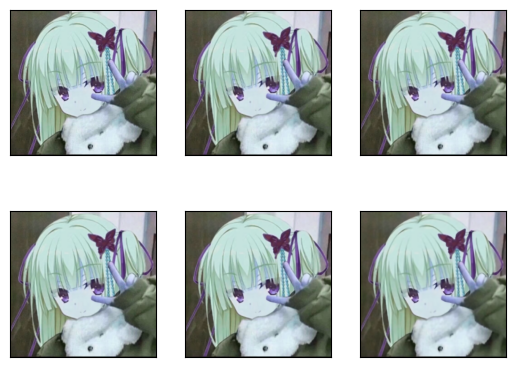

In [218]:
for i in range(6):
 plt.subplot(2,3,i+1)
 plt.imshow(images[i],"gray")
 plt.xticks([])
 plt.yticks([])  
plt.show()


In [220]:
#扩张 侵蚀

In [221]:
kerner=np.ones((5,5),np.uint8)
hu6=cv2.dilate(hu,kerner,iterations=1)#扩张
hu6_1=cv2.dilate(hu,kerner,iterations=2)#扩张
hu7=cv2.erode(hu,kerner,iterations=1)#侵蚀
hu7_1=cv2.erode(hu,kerner,iterations=2)#侵蚀
hu8=np.hstack((hu,hu6,hu6_1,hu7,hu7_1))
cv2.imshow("dilate and erode",cv2.resize(hu8,(0,0),fx=0.3,fy=0.3))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [222]:
#开运算 闭运算

In [223]:
img=cv2.imread("hua.jpg")
kernel=np.ones((5,5),np.uint8)
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)#先腐蚀，再膨胀
closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)#梯度：膨胀-腐蚀
cv2.imwrite("buti.png",gradient)
tophat=cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)#礼帽：原始-开运算
blackhat=cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)#黑帽：闭运算-原始
box=np.hstack((img,opening,closing,gradient,tophat,blackhat))
cv2.imshow("open close gradient tophat blackhat",cv2.resize(box,(0,0),fx=0.3,fy=0.3))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [224]:
#梯度：Sobel算子

In [249]:
img=cv2.imread("hua.jpg",0)
img_1=cv2.Sobel(img,-1,1,0,3)
img_2=cv2.Sobel(img,-1,0,1,3)
img_3=cv2.addWeighted(img_1,0.5,img_2,0.5,0)
img_all=np.hstack((img_1,img_2,img_3))
cv2.imshow("l",cv2.resize(img_all,(0,0),fx=0.7,fy=0.7))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [255]:
img=cv2.imread("download_1.png",0)
img_1=cv2.Sobel(img,cv2.CV_64F,1,0,3)
img_1=cv2.convertScaleAbs(img_1)
img_2=cv2.Sobel(img,cv2.CV_64F,0,1,3)
img_2=cv2.convertScaleAbs(img_2)
img_3=cv2.addWeighted(img_1,0.5,img_2,0.5,0)
img_all=np.hstack((img_1,img_2,img_3))
cv2.imshow("l",cv2.resize(img_all,(0,0),fx=0.7,fy=0.7))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [269]:
#Canny算子 边缘检测

In [281]:
img=cv2.imread("download_1.png",0)
v1=cv2.Canny(img,30,400)
v2=cv2.Canny(img,30,100)
vall=np.hstack((v1,v2))
cv2.imshow("",cv2.resize(vall,(0,0),fx=0.8,fy=0.8))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [294]:
#角点检测

In [297]:
img=cv2.imread("hua.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
i=cv2.cornerHarris(gray,2,3,0.04)

In [298]:
img[i>0.01*i.max()]=[0,0,255]
cv2.imshow("5",img)
cv2.waitKey(0)
cv2.destroyAllWindows()